In [1]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use('../../solving_pde_mooc/notebooks/styles/mainstyle.use')

In [2]:
# Defining Parameters
g = 9.81       # m/s2 gravitational constant

# Defining Initial Conditions
h0 = 100.      # initial height
v0 = 0.        # initial velocity

# Defining time discretization
ti = 0.        # initial time
tf = 4.0       # final time at which solution is needed
dt =0.1        # time step
nt = int((tf-ti)/dt)

# Defining the equation matrices

b = np.array([0, -g])

L = np.array([[0., 1.],
              [0., 0.]])

In [3]:
# defining the time
t = np.arange(nt+1)*dt

In [4]:
# solution using Forward Euler Method

y = np.empty((nt+1,2))

y[0] = h0, v0

for i in range(nt):
    y[i+1] = y[i] + np.dot(L,y[i])*dt + b*dt    

In [7]:
# solution using explicit 2RK method

y_exp_2rk = np.empty((nt+1,2))

y_exp_2rk[0] = h0, v0

for i in range(nt):
    y_star = y_exp_2rk[i] + 0.5*dt*(np.dot(L,y_exp_2rk[i])+b)
    y_exp_2rk [i+1] = y_exp_2rk[i] + dt*(np.dot(L,y_star)+b)

In [ ]:
# solution using implicit 2RK method

y_imp_2rk = np.empty((nt+1,2))

y_imp_2rk[0] = h0,v0



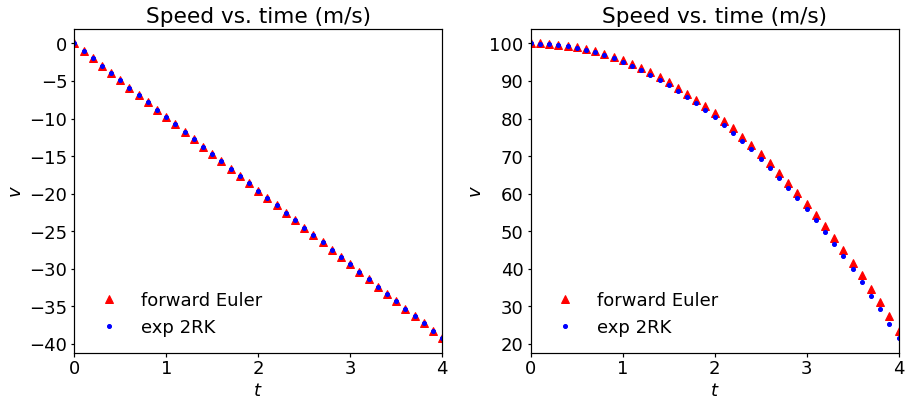

In [6]:
fig, ax = plt.subplots(1,2,figsize=(13,6))

ax[0].plot(t,y[:,1],'^',color='red',label='forward Euler')
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$v$')
ax[0].set_title('Speed vs. time (m/s)')

ax[0].plot(t,y_exp_2rk[:,1],'.',color='blue',label='exp 2RK')
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$v$')
ax[0].set_title('Speed vs. time (m/s)')

ax[1].plot(t,y[:,0],'^', color='red',label='forward Euler')
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$h$')
ax[1].set_title('Height vs. time (m)')

ax[1].plot(t,y_exp_2rk[:,0],'.',color='blue',label='exp 2RK')
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$v$')
ax[1].set_title('Speed vs. time (m/s)')

for axis in ax:
    axis.set_xlim(t[0],t[-1])
    axis.legend(loc='lower left')